# Análisis de Componentes Principales

Vamos a aprender a aplicar esto en Python.<br>
Ejercicio sacado de Youtube: https://www.youtube.com/watch?v=Lsue2gEM9D0

In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

Creamos nuestra DataBase con 5 cepas Wild Type y 5 cepas Knock Out.<br>
Para cada una, vamos a evaluar 100 genes (números entre 1 y 1000).<br>

In [3]:
genes = ['gene' + str(i) for i in range(1, 101)]

wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

In [4]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [5]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [6]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,272,271,247,292,284,325,306,305,326,290
gene2,61,69,56,74,38,427,443,446,469,491
gene3,785,764,731,741,791,258,223,241,231,221
gene4,65,72,67,75,63,836,945,960,908,896
gene5,168,163,161,135,170,710,738,750,807,743


In [19]:
data['wt1']

gene1      272
gene2       61
gene3      785
gene4       65
gene5      168
          ... 
gene96     525
gene97     860
gene98     860
gene99     696
gene100     65
Name: wt1, Length: 100, dtype: object

In [31]:
a = data.describe()
a

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
count,100,100,100,100,100,100,100,100,100,100
unique,92,95,95,95,95,95,96,94,92,96
top,65,677,64,731,497,401,768,197,384,896
freq,3,2,3,2,2,2,2,2,2,2


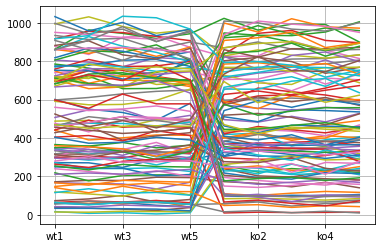

In [33]:
# fila = data.loc['gene1']
# filas = [data.iloc[n] for n in range(5)]
# plt.plot(filas)
for i in range(len(data.index)):
    fila = data.iloc[i]
    fila.plot()
# plt.legend(loc = 'upper left')
plt.grid(True)

In [28]:
data.describe()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
count,100,100,100,100,100,100,100,100,100,100
unique,97,95,94,94,95,95,96,96,94,95
top,223,412,957,986,408,554,561,820,748,810
freq,2,3,2,2,2,2,2,2,2,2


In [29]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,861,838,803,865,853,577,607,590,599,598
gene2,321,311,318,293,280,281,294,294,291,272
gene3,721,763,723,711,779,657,649,671,646,626
gene4,442,412,434,431,440,260,240,277,252,268
gene5,47,47,50,46,49,509,522,511,476,504


In [30]:
data.shape

(100, 10)

Antes de seguir con PCA, tenemos que <b>CENTRAR Y ESCALAR</b> nuestros datos.
<br>
Luego de centrar, el valor promedio de cada gen será 0.<br>
Luego de escalar, su SD será 1.

In [31]:
scaled_data = preprocessing.scale(data.T)

# Opción alternativa: StandardScaler().fit_transform(data.T)

La función necesita los elementos en filas, no en columnas, por eso transponemos

In [32]:
type(scaled_data)

numpy.ndarray

In [33]:
scaled_data.shape

(10, 100)

In [34]:
scaled_data[0][:15]

array([ 1.12518842,  1.63565749,  0.53127854,  1.10805769, -1.00235862,
       -0.99082567, -1.03745047,  1.08560498, -1.02882054,  0.89902088,
        0.88065516, -1.03292273, -1.04626386,  1.87468623, -1.03332232])

Ahora sí seguimos! Vamos a crear una instancia de la clase PCA

In [35]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [36]:
pca_data.shape

(10, 10)

In [37]:
type(pca_data)

numpy.ndarray

.fit: hace toda la matemática, calcula los loading scores y la variación de cada Componente Principal (recta que ajusta a los datos)
<br>
.transform: acá generamos las coordenadas del gráfico de PCA basados en los loading scores y la scaled data.

La idea ahora es <b>GRAFICAR</b>. Vamos a armar un <em>Scree plot</em> para evaluar cuántos componentes principales deberían ir en el gráfico final.

Lo primero que hay que hacer es calcular el porcentaje de variación de cada Componente Principal.

In [38]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

Ahora creamos etiquetas para el <b>Scree Plot</b>. Una etiqueta por cada componente principal.

In [39]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

Nos mandamos a armar el Scree plot (que es un gráfico de barras que muestra la el aporte de cada Componente principal a la varianza).

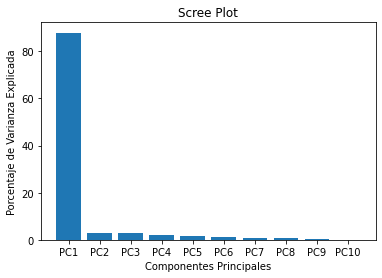

In [40]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Scree Plot')
plt.show()

Vemos que casi toda la variación está en el primer PC. Así que un gráfico 2D usando PC1 y PC2 va a ir bien para representar los datos originales.

Ahora nuestra misión es crear un <b>Gráfico de PCA</b>.<br>
Para esto, agarramos la matriz que calculamos previamente con <em>pca.transform(scaled_data)</em> y la convertimos a un DataFrame, con filas con etiquetas de Sample y columnas con etiquetas de PC.

In [41]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

Luego, nos mandamos a armar el gráfico (es un Scatter Plot). Acá hay muchos detalles de matplotlib que nunca vi bien, pero funciona!

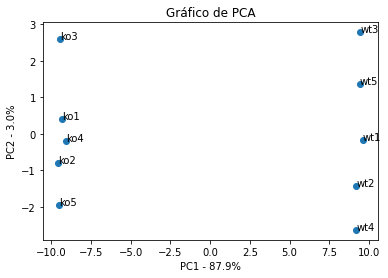

In [42]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('Gráfico de PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

Se puede apreciar acá que los WildType están agrupados en un sector, lo que sugiere que están correlacionados entre sí. Lo mismo ocurre con los KnockOut.

Finalmente, vamos a ver cuáles fueron los genes que tuvieron la mayor influencia en separar ambos clústers a lo largo del eje X.

In [43]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene43   -0.106620
gene7    -0.106613
gene51   -0.106595
gene22   -0.106587
gene5    -0.106586
gene8     0.106557
gene58   -0.106549
gene12   -0.106543
gene9    -0.106520
gene6    -0.106498
dtype: float64


Vemos que varios fueron los genes que colaboraron en esta tarea, tanto para los WT como para los KO.
<br>
<b>BAM!</b>